In [1]:
# Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# Import datasets
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
# Scaling
scale_factor = 1000.0
train_df["median_house_value"] /= scale_factor 
test_df["median_house_value"] /= scale_factor

In [11]:
def build_model(my_learning_rate):
    # create simple model
    model = tf.keras.models.Sequential()
    
    # add one linear layer to yield a simple linear regressor
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    # compile model into optimized code for TF
    # configure training to minimize the model's mean squared error
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

In [13]:
#Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

Epoch 1/30
94/94 [==============================] - 0s 5ms/step - loss: 46427.1641 - root_mean_squared_error: 215.4696 - val_loss: 34576.6875 - val_root_mean_squared_error: 185.9481
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 32403.7891 - root_mean_squared_error: 180.0105 - val_loss: 23532.9082 - val_root_mean_squared_error: 153.4044
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 21569.3418 - root_mean_squared_error: 146.8651 - val_loss: 15347.5889 - val_root_mean_squared_error: 123.8854
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 13842.3662 - root_mean_squared_error: 117.6536 - val_loss: 10010.8486 - val_root_mean_squared_error: 100.0542
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 9111.2266 - root_mean_squared_error: 95.4527 - val_loss: 7447.4243 - val_root_mean_squared_error: 86.2985
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 7181.6504 - root_mean_

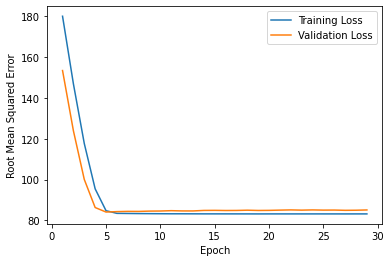

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.45

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

According to google_crash course, the loss curves differ "significantly" ...

<AxesSubplot:>

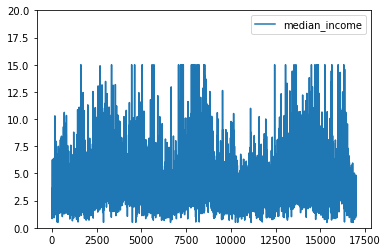

In [44]:
train_df.plot(x=None,y="median_income",ylim=(0,20))

<AxesSubplot:>

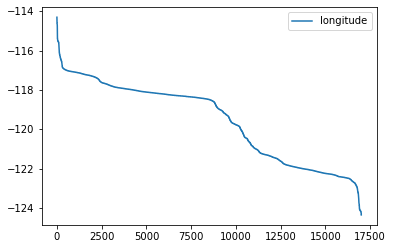

In [57]:
train_df.plot(x=None,y="longitude")

<AxesSubplot:>

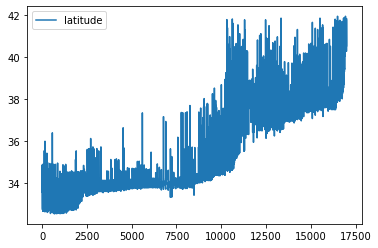

In [48]:
train_df.plot(x=None,y="latitude")

Problem : data are sorted by longitude, so this is not a real randomness...

In [49]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

<AxesSubplot:>

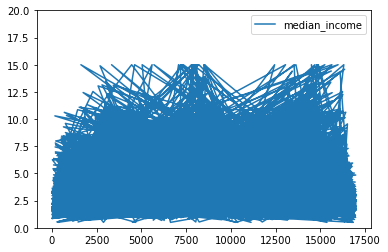

In [67]:
shuffled_train_df.plot(x=None,y="median_income",ylim=(0,20))

Dataframe is indeed shuffled

Epoch 1/30
119/119 [==============================] - 0s 3ms/step - loss: 44699.2266 - root_mean_squared_error: 211.4219 - val_loss: 34739.7500 - val_root_mean_squared_error: 186.3860
Epoch 2/30
119/119 [==============================] - 0s 2ms/step - loss: 28052.7520 - root_mean_squared_error: 167.4896 - val_loss: 20992.3320 - val_root_mean_squared_error: 144.8873
Epoch 3/30
119/119 [==============================] - 0s 2ms/step - loss: 16435.2285 - root_mean_squared_error: 128.2000 - val_loss: 12060.4844 - val_root_mean_squared_error: 109.8202
Epoch 4/30
119/119 [==============================] - 0s 2ms/step - loss: 9618.0166 - root_mean_squared_error: 98.0715 - val_loss: 7744.5703 - val_root_mean_squared_error: 88.0032
Epoch 5/30
119/119 [==============================] - 0s 2ms/step - loss: 7183.9072 - root_mean_squared_error: 84.7579 - val_loss: 7049.5508 - val_root_mean_squared_error: 83.9616
Epoch 6/30
119/119 [==============================] - 0s 3ms/step - loss: 7004.6274 - ro

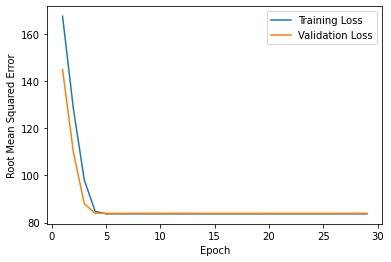

In [74]:
learning_rate = 0.08
epochs = 30
batch_size = 100

validation_split=0.3

my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

my_model = None

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

So the important thing is to shuffle ! And also to have a proper split between Validation and Trainging set (between 20% and 80% ?)

In [75]:
# There exist a method to direclty evaluate the model !
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 839us/step - loss: 7015.7646 - root_mean_squared_error: 83.7602


We compare the rmse (Root Mean Square Error)

`Training set = 83.67
Validation set = 83.91
Test set = 83.76`

-> close enough
